# 03. Data Visualitation: Cars FInal 

Along this notebook we will perform an exploratory analysis of the dataset, having a look to all the variables and checking for outliners.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
cars = ("/users/alfon/Desktop/Master/TFM/CSV/cars_cleaned_colour.csv")

In [3]:
df = pd.read_csv(cars)
df.head()

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Price_EUR
0,Fiat,Tipo,1.4 Easy,Small,2017,24000,95,Manual,Petrol,6.5,5,Beige,43001,Tarragona,10900
1,SEAT,Leon,2.0TDI CR S&S FR Fast Edition DSG7 150,Small,2020,14122,150,Automatic,Diesel,4.3,5,Blue,43006,Tarragona,24200
2,Audi,A3,Sportback 1.6TDI Design Edition 81kW,Small,2017,65290,110,Manual,Diesel,3.9,5,Blue,43006,Tarragona,19200
3,Honda,Civic,1.0 VTEC Turbo Elegance Navi,Small,2018,54189,129,Manual,Petrol,5.1,5,Blue,43204,Tarragona,18900
4,Volkswagen,Beetle,1.4 TSI Sport 160,Small,2013,105300,159,Manual,Petrol,6.6,5,Brown,43001,Tarragona,19900


## Analysing the Prices

Text(0.5, 1.0, 'Cars per Brand')

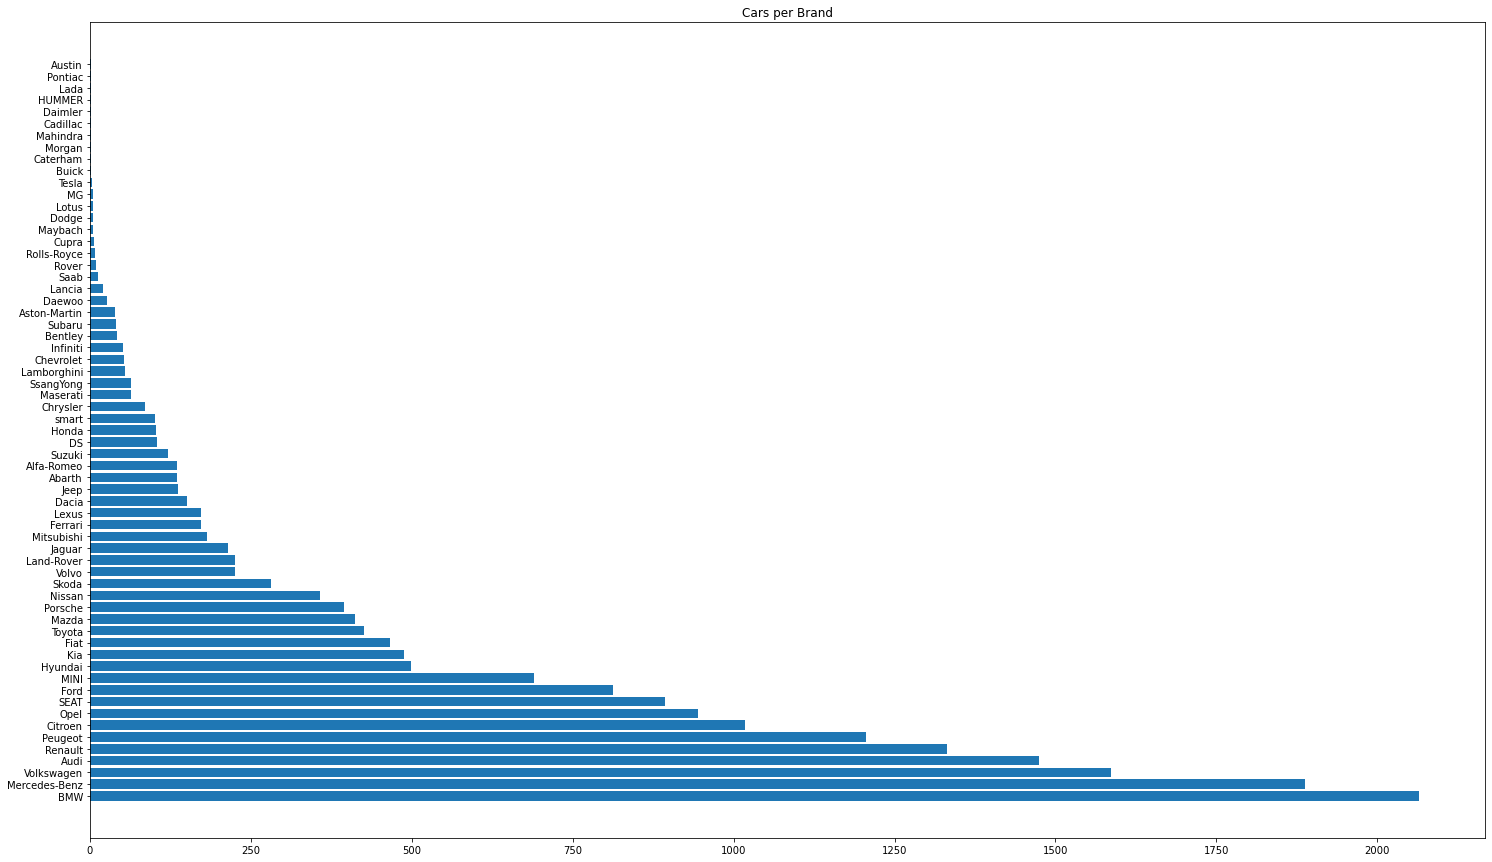

In [4]:
fig, ax = plt.subplots (figsize=(25,15))
plt.barh(df.Brand.value_counts().index, df.Brand.value_counts().values);
plt.title("Cars per Brand")

In [5]:
df_mean_price = df.groupby("Brand")["Price_EUR"].mean().reset_index()

df_mean_price.head()

,Brand,Price_EUR
0,Abarth,17428.185185
1,Alfa-Romeo,14277.718519
2,Aston-Martin,191965.333333
3,Audi,26920.530169
4,Austin,16900.000000


<AxesSubplot:title={'center':'Mean_Price per Brand'}, xlabel='Brand'>

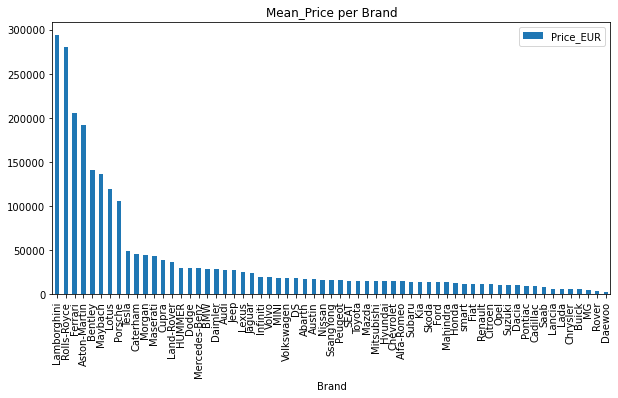

In [6]:
df_mean_price = df_mean_price.sort_values("Price_EUR", ascending = False)

df_mean_price.plot(x = "Brand", y = "Price_EUR", kind = "bar", figsize = (10,5), title = "Mean_Price per Brand")


## Analysing the Year

<AxesSubplot:ylabel='Frequency'>

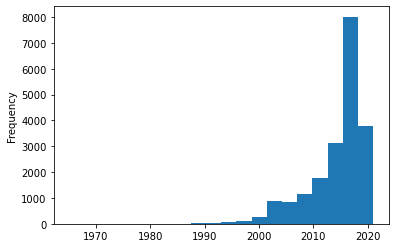

In [7]:
df['Year'].plot(kind='hist', bins=20)

As we can see on the graph above most of the cars on the data frame are from 2010 in advance

## Analysing the Fuel type

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'Hybrid'),
  Text(3, 0, 'Electric'),
  Text(4, 0, 'Compressed Natural Gas \\(CNG\\)')])

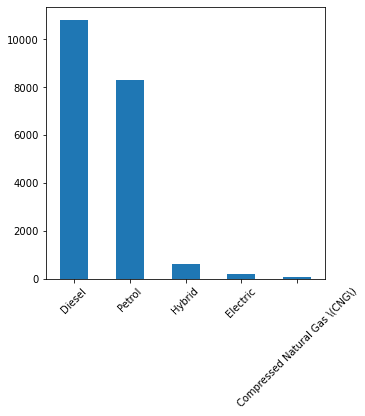

In [8]:
df_Fuel_type = df['Fuel_type'].value_counts()
df_Fuel_type.plot(kind = "bar", figsize = (5,5))
plt.xticks(rotation=45)


Hybris and Electric cars are still not very popular in the market.

## Analysing the Gear type

<AxesSubplot:ylabel='Gear_type'>

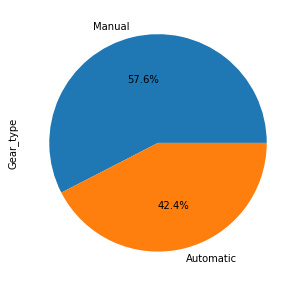

In [9]:
df_Gear_type = df['Gear_type'].value_counts()
df_Gear_type.plot.pie(y='Gear',figsize=(5, 5),autopct='%1.1f%%', startangle=0)

The conclusion obtained from aboves pie is that the cars on this dataset are diveded almost equally between Automatic and Manual transmissions

## Analysing the Province

In [10]:
import geopandas as gpd

In [11]:
df_province = df[["Province", "ZIP"]]

df_province['ZIP'] = df_province['ZIP'].apply(str).apply(lambda x: x.zfill(5))

df_province['ZIP'] = df_province['ZIP'].str.slice(stop = 2)

df_province.sample(5)

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_6125/1957262456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province['ZIP'] = df_province['ZIP'].apply(str).apply(lambda x: x.zfill(5))
/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_6125/1957262456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province['ZIP'] = df_province['ZIP'].str.slice(stop = 2)


,Province,ZIP
11482,Murcia,30
17415,Albacete,02
3809,Madrid,28
16874,Vizcaya,48
669,Zaragoza,50


In [12]:
df_province_grouped = df_province["ZIP"].value_counts().reset_index()
df_province_grouped.head()

,index,ZIP
0,28,5057
1,08,2550
2,46,1563
3,03,1176
4,29,1154


In [13]:
# Filepaths
ub_shp = "/users/alfon/Desktop/Master/TFM/Files/gadm36_ESP_shp/gadm36_ESP_2.shp"

# Opening the files
spain_shapefile = gpd.read_file(ub_shp, encoding='utf-8')
spain_shapefile.sample(2)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
10,ESP,Spain,ESP.2_1,Aragón,None,ESP.2.3_1,Zaragoza,None,None,Provincia,Province,50,ES.AR.ZG,"POLYGON ((0.14589 41.06306, 0.14458 41.06584, ..."
14,ESP,Spain,ESP.4_1,Castilla-La Mancha,None,ESP.4.3_1,Cuenca,None,None,Provincia,Province,16,ES.CM.CU,"POLYGON ((-2.66225 39.32198, -2.66506 39.32299..."


In [14]:
spain_shapefile = spain_shapefile.merge(df_province_grouped, left_on=['CC_2'],right_on=['index'], how='left')

In [15]:
plt.rcParams["figure.figsize"]=20,20


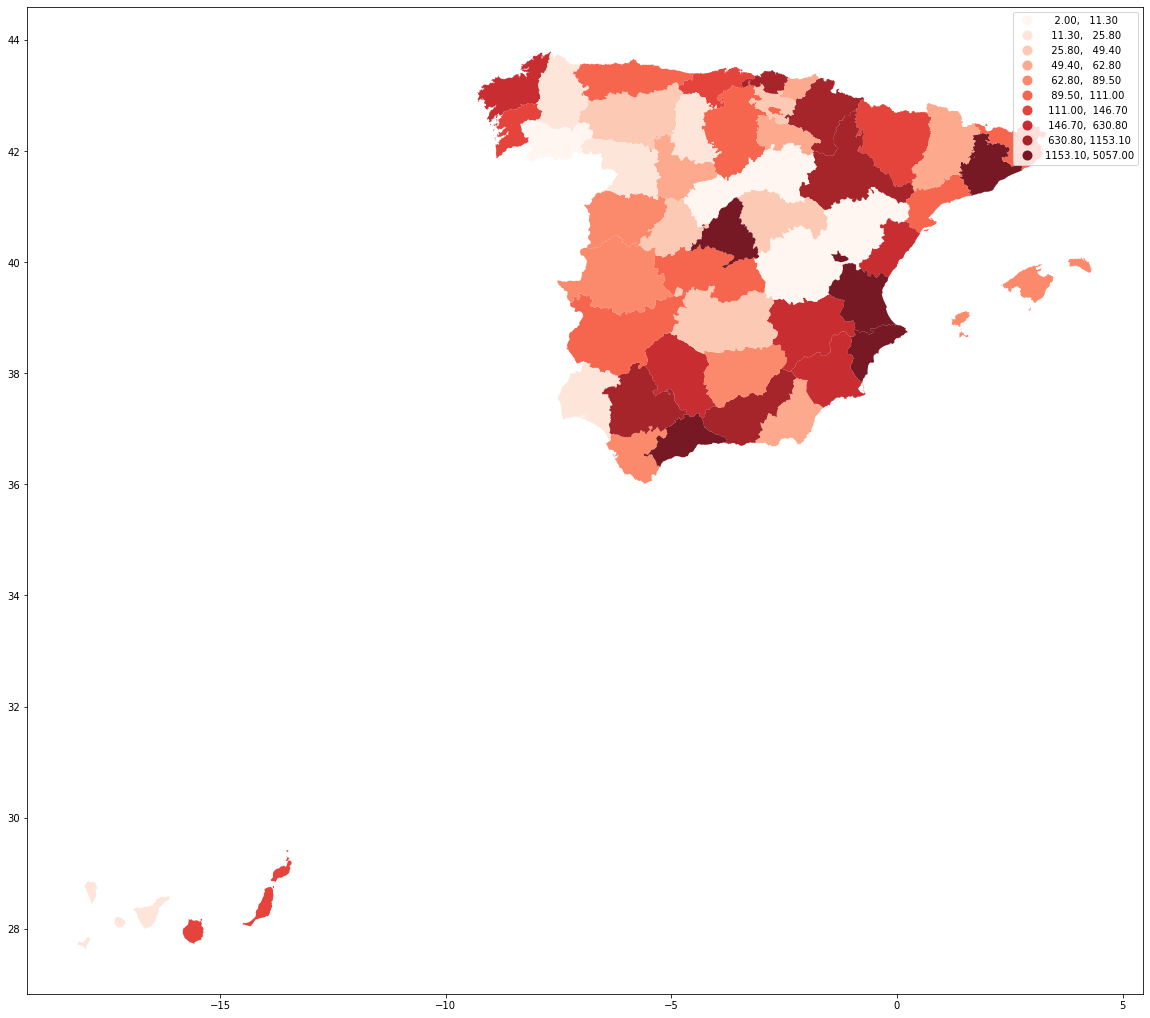

In [16]:
spain_map = spain_shapefile.plot(column="ZIP", scheme = "quantiles" ,linewidth=0.9, cmap="Reds", k=10, alpha=0.9, legend=True) 

## Checking Outliners

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,20015.0,2014.508269,5.362405,1965.0,2012.0,2016.0,2018.0,2021.0
Kms,20015.0,88775.767724,65668.896057,0.0,41000.0,80413.0,124000.0,1999999.0
Hp,20015.0,165.908968,97.908610,41.0,116.0,140.0,179.0,799.0
Fuel_cons,20015.0,5.595933,2.396655,0.0,4.3,5.1,6.3,22.0
Doors,20015.0,4.503972,0.863742,3.0,5.0,5.0,5.0,5.0
ZIP,20015.0,26352.469748,14686.551514,1003.0,12006.0,28260.0,36213.5,280905.0
Price_EUR,20015.0,23755.464751,40076.331198,19.0,10700.0,15974.0,23570.0,999999.0


### a) Year:

<AxesSubplot:>

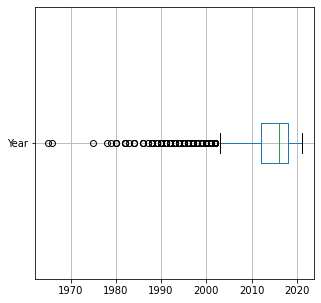

In [18]:
df.boxplot('Year', vert = False, figsize = (5,5))

In [19]:
df[df["Year"] < 2001 ].sample(5)

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Price_EUR
331,Jaguar,XJ,XJ6 3.2 Sport,Sedan,1997,235015,216,Automatic,Petrol,14.7,5,Green,50013,Zaragoza,7490
5246,Mercedes-Benz,SLK 200,NaN,Coupe,1997,103817,136,Manual,Petrol,8.1,3,Silver,28027,Madrid,5950
14378,Volkswagen,Polo,1.4 3 porte Comfortline,Small,2000,123900,60,Manual,Petrol,6.1,5,Silver,29750,Málaga,1990
17000,Citroen,SAXO,1.4i VTS,Small,2000,62169,75,Manual,Petrol,6.8,5,Grey,2007,Albacete,2250
17488,Citroen,SAXO,1.4i VTS,Small,2000,62169,75,Manual,Petrol,6.8,5,Grey,31610,Navarra,2250


The cars above are all previous to 2001. We can come to the conclusion that there is no problem with outliners for the Year column

### Kms:

<AxesSubplot:>

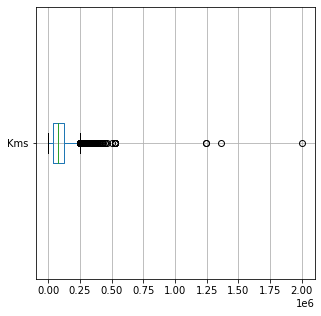

In [20]:
df.boxplot('Kms', vert = False, figsize = (5,5))

In [21]:
df_very_out_kms = df[df["Kms"] > 1000000 ]


In [22]:
# HAVE TO REMOVE aboves

df = df.drop(df[df["Kms"] > 1000000 ].index)


In [23]:
df_out_kms = df[df["Kms"] > 400000 ]
df_out_kms

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Price_EUR
417,BMW,320,320d Touring,Wagon,2006,524290,163,Manual,Diesel,5.9,5,Grey,50011,Zaragoza,3600
6126,Toyota,Land Cruiser,95 TD GX,Suv,1998,527854,125,Manual,Diesel,11.1,5,Green,28945,Madrid,6900
6179,Toyota,Land Cruiser,90 TD VX,Suv,1998,420000,125,Manual,Diesel,11.1,5,Green,28939,Madrid,13250
7440,BMW,320,320d Touring,Wagon,2006,524290,163,Manual,Diesel,5.9,5,Grey,8241,Barcelona,3600
8868,Land-Rover,Discovery,2.5 TDI ES,Suv,2000,425000,111,Manual,Diesel,8.9,5,Yellow,8560,Barcelona,2500
10280,BMW,320,320d Touring,Wagon,2006,524290,163,Manual,Diesel,5.9,5,Grey,46930,Valencia,3600
10513,Renault,Grand Scenic,Grand 1.9dCi Confort Authentique,Minivan,2004,450000,120,Manual,Diesel,6.0,5,Green,46940,Valencia,3500
10627,Renault,Grand Scenic,1.5dCi Dynamique 5pl.,Minivan,2010,466620,110,Manual,Diesel,4.9,5,White,46930,Valencia,2990
10634,Toyota,Verso,2.0D4D Active,Minivan,2010,403500,126,Manual,Diesel,5.6,5,White,46930,Valencia,3990
12518,Volkswagen,Touran,2.0TDI Highline 170,Minivan,2007,406585,170,Manual,Diesel,6.6,5,Black,3006,Alicante,3300


<AxesSubplot:>

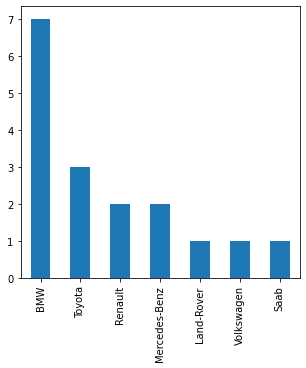

In [24]:
df_out_kms_by_brand = df_out_kms['Brand'].value_counts()
df_out_kms_by_brand.plot(kind = "bar", figsize = (5,5))


From .decribe T function above we can see that the largest milage is 681k Kms and the bar graph just above shows that the cars with an outliner mileage are eather Premium makes or generalistic car makes dedicated to the transport industry so we can conclude there are no outliners for Kms

### Horse Power:

<AxesSubplot:>

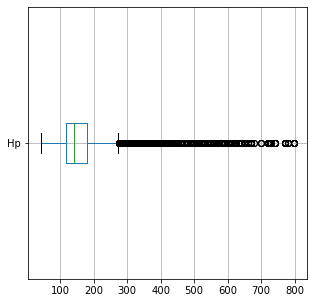

In [25]:
df.boxplot('Hp', vert = False, figsize = (5,5))

In [26]:
df[df["Hp"] > 300 ]

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Price_EUR
32,Mercedes-Benz,E 55 AMG,Aut.,Sedan,2003,211000,476,Automatic,Petrol,12.9,5,Black,43760,Tarragona,16000
38,Audi,RS4,Avant TFSI quattro tiptronic,Wagon,2019,32500,450,Automatic,Petrol,9.2,5,Red,43006,Tarragona,73700
51,BMW,M2,CS,Coupe,2020,16840,450,Manual,Petrol,10.0,3,Blue,43204,Tarragona,89990
52,BMW,M2,M2A Competition,Coupe,2019,24900,411,Automatic,Petrol,9.2,3,Blue,43004,Tarragona,58900
54,BMW,M4,Coupé Competition,Coupe,2021,1,510,Automatic,Petrol,0.0,3,Blue,43204,Tarragona,119900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,Bentley,Continental,GTC Aut.,Convertible,2010,51000,559,Automatic,Petrol,17.1,3,Beige,26302,La Rioja,86900
19972,BMW,M4,Cabrio Competition xDrive,Convertible,2021,5000,510,Automatic,Petrol,0.0,3,Grey,26302,La Rioja,109900
19979,Mercedes-Benz,GLC 43 AMG,4Matic Aut.,Suv,2017,79000,367,Automatic,Petrol,8.3,5,Blue,26500,La Rioja,47995
20011,BMW,M4,M4,Coupe,2016,35000,431,Automatic,Petrol,8.8,3,Yellow,40002,Segovia,50900


Cars with more than 300 Hp are luxury cars. No reason to consider them as outliners

### Fuel consumption:

<AxesSubplot:>

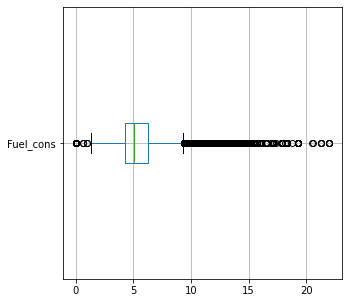

In [27]:
df.boxplot( "Fuel_cons", vert = False , figsize = (5,5))

In [28]:
df[df["Fuel_cons"] == 0]

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Price_EUR
11,Fiat,Tipo,Sedán 1.0 City Life,Small,2021,10,99,Manual,Petrol,0.0,5,Green,43870,Tarragona,16900
17,SEAT,Ibiza,1.0 TSI S&S Style 110,Small,2021,1000,110,Manual,Petrol,0.0,5,Black,43830,Tarragona,17500
24,Nissan,Leaf,40 kWh Tekna,Small,2020,400,150,Automatic,Electric,0.0,5,Burgundy,43870,Tarragona,26990
45,BMW,i3,94Ah BEV,Minivan,2018,43138,170,Automatic,Electric,0.0,5,Blue,43204,Tarragona,20900
54,BMW,M4,Coupé Competition,Coupe,2021,1,510,Automatic,Petrol,0.0,3,Blue,43204,Tarragona,119900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19913,smart,forFour,EQ,Small,2021,4426,82,Automatic,Electric,0.0,5,Red,19004,Guadalajara,19000
19932,BMW,635,M635CSi,Coupe,1984,160000,286,Manual,Petrol,0.0,3,Burgundy,19200,Guadalajara,50000
19946,Bentley,Turbo R,LWB,Sedan,1993,28000,320,Automatic,Petrol,0.0,5,Blue,26302,La Rioja,35900
19972,BMW,M4,Cabrio Competition xDrive,Convertible,2021,5000,510,Automatic,Petrol,0.0,3,Grey,26302,La Rioja,109900


Some of the cars above could have a 0 l / 100 km consume as they are electric vehicles, others have that field missed and we are going to fill it with the the mean of the data set

In [29]:
df[(df["Fuel_cons"] == 0) & (df["Fuel_type"] != "Electric")] 

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Price_EUR
11,Fiat,Tipo,Sedán 1.0 City Life,Small,2021,10,99,Manual,Petrol,0.0,5,Green,43870,Tarragona,16900
17,SEAT,Ibiza,1.0 TSI S&S Style 110,Small,2021,1000,110,Manual,Petrol,0.0,5,Black,43830,Tarragona,17500
54,BMW,M4,Coupé Competition,Coupe,2021,1,510,Automatic,Petrol,0.0,3,Blue,43204,Tarragona,119900
65,BMW,M4,Coupé Competition,Coupe,2021,1,510,Automatic,Petrol,0.0,3,Blue,43204,Tarragona,119900
81,BMW,M3,M3 Cabriolet,Convertible,1994,120000,286,Manual,Petrol,0.0,3,Blue,43890,Tarragona,29800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19905,Hyundai,Bayon,1.2 MPI Essence,Suv,2021,5,84,Manual,Petrol,0.0,5,Grey,5004,Ávila,13500
19932,BMW,635,M635CSi,Coupe,1984,160000,286,Manual,Petrol,0.0,3,Burgundy,19200,Guadalajara,50000
19946,Bentley,Turbo R,LWB,Sedan,1993,28000,320,Automatic,Petrol,0.0,5,Blue,26302,La Rioja,35900
19972,BMW,M4,Cabrio Competition xDrive,Convertible,2021,5000,510,Automatic,Petrol,0.0,3,Grey,26302,La Rioja,109900


In [30]:
df.Fuel_cons[(df["Fuel_type"] != "Electric") & (df["Fuel_cons"] == 0)] = df["Fuel_cons"].replace(0 , np.NaN)\
                                 .fillna(df["Fuel_cons"].mean())




/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_6125/3477074120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fuel_cons[(df["Fuel_type"] != "Electric") & (df["Fuel_cons"] == 0)] = df["Fuel_cons"].replace(0 , np.NaN)\


In [32]:
df[df["Fuel_cons"] > 10]

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Price_EUR
32,Mercedes-Benz,E 55 AMG,Aut.,Sedan,2003,211000,476,Automatic,Petrol,12.9,5,Black,43760,Tarragona,16000
56,Ferrari,488,Pista,Coupe,2019,1500,721,Automatic,Petrol,11.4,3,Yellow,43883,Tarragona,429900
57,Audi,RS Q8,TFSI quattro tiptronic,Coupe,2020,40750,600,Automatic,Petrol,12.1,3,Grey,43006,Tarragona,149000
67,Ferrari,488,Pista,Coupe,2019,1500,721,Automatic,Petrol,11.4,3,Yellow,43883,Tarragona,429900
68,Audi,RS Q8,TFSI quattro tiptronic,Coupe,2020,40750,600,Automatic,Petrol,12.1,3,Grey,43006,Tarragona,149000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19929,Ferrari,812,Superfast,Coupe,2020,2300,799,Automatic,Petrol,14.9,3,Grey,19004,Guadalajara,349000
19964,Lamborghini,Gallardo,Spyder,Coupe,2007,89000,519,Automatic,Petrol,17.0,3,Yellow,26302,La Rioja,84900
19967,Lamborghini,Gallardo,Spyder,Coupe,2007,89000,519,Automatic,Petrol,17.0,3,Yellow,26302,La Rioja,84900
19971,Bentley,Continental,GTC Aut.,Convertible,2010,51000,559,Automatic,Petrol,17.1,3,Beige,26302,La Rioja,86900


Cars with a consume above 10 L / 100km are not outliners

### Price:

(0.0, 2000000.0)

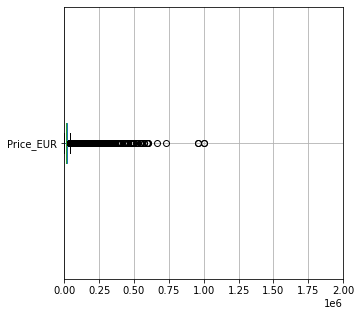

In [33]:
df.boxplot("Price_EUR", vert = False, figsize = (5,5))
plt.xlim(0,2000000)

<AxesSubplot:title={'center':'Price_EUR'}, xlabel='Brand'>

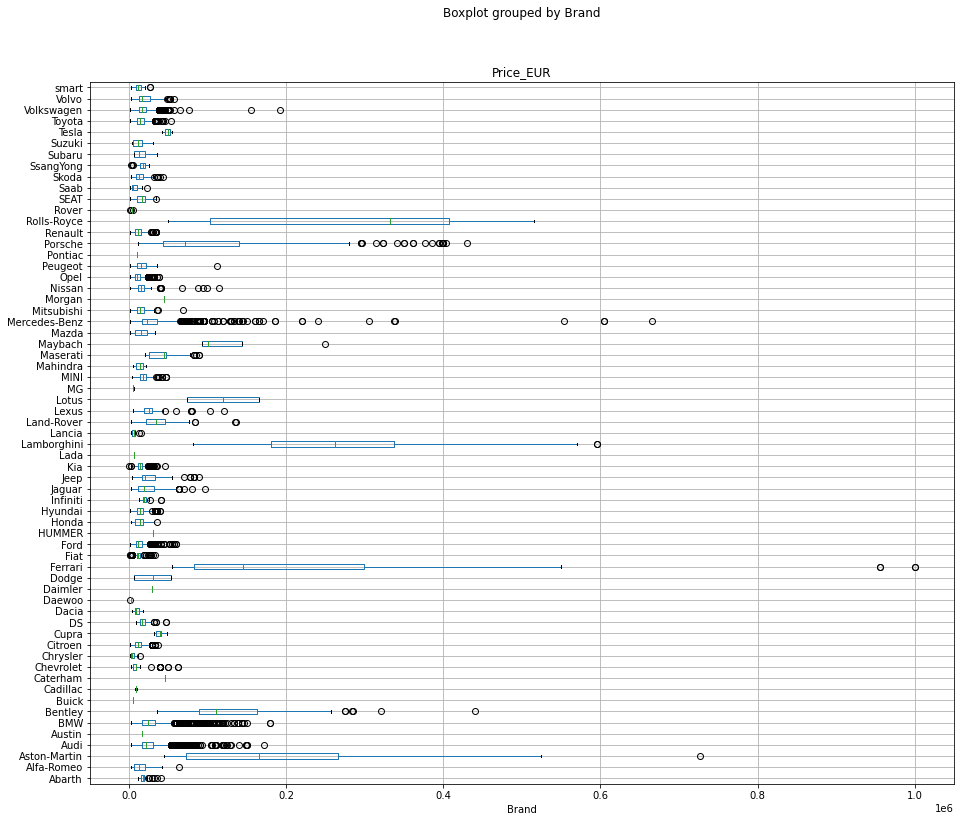

In [34]:
df.boxplot(column = "Price_EUR", by='Brand', vert = False, figsize = (15,13))

In [35]:
df.to_csv('/users/alfon/Desktop/Master/TFM/CSV/cars_final_colour.csv', header=True, index=False)
